In [ ]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=2, random_state =3, n_clusters_per_class=1, n_features=2, n_informative=2, n_redundant=0)

In [ ]:
print(X.shape, Y.shape)

(1000, 2) (1000,)


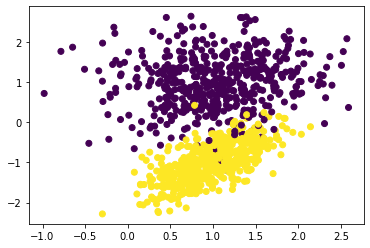

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [ ]:
Y[Y==0] = -1

In [ ]:
from numpy.lib.shape_base import tile
class svm:
  def __init__(self, C=1.0):
    self.C = C
    self.W = 0
    self.b = 0


  def hingeloss(self, W, b, X, Y):
    loss=0.0

    loss+= 0.5*(np.dot(W, W.T))
    m=X.shape[0]

    for i in range(m):
      ti = Y[i]*(np.dot(W, X[i].T)+b)
      loss+=self.C*max(0, (1-ti))

    return loss[0][0]

  def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr = 100):
    no_features = X.shape[1]
    no_samples = X.shape[0]

    c = self.C
    W=np.zeros((1, no_features))
    bias=0
    h_loss = self.hingeloss(W, bias, X, Y)
    print(h_loss)

    # _________________________________________________
    losses = []
    for i in range(maxItr):
      print(f"\rOn {i}", end="")
      l=self.hingeloss(W, bias, X, Y)
      losses.append(l)

      ids = np.arange(no_samples)
      np.random.shuffle(ids)

      for batch_start in range(0, no_samples):

        grad_w = 0
        grad_b = 0

        for j in range(batch_start, batch_start + batch_size):
          if j< no_samples:
            i=ids[j]
            ti = Y[i]*(np.dot(W, X[i].T)+bias)

            if ti>=1:
              grad_w += 0
              grad_b += 0

            else:
              grad_w += c*Y[i]*X[i]
              grad_b += c*Y[i]

        W = W - learning_rate*W + learning_rate*grad_w
        bias = bias + learning_rate*grad_b

    self.W = W
    self.b = bias
    return W, bias, losses

In [ ]:
mysvm = svm()
W, b, losses = mysvm.fit(X, Y)

1000.0
On 99

In [ ]:
print(losses)

[1000.0, 110.79596847352052, 98.13176103482938, 97.686639939315, 103.2930402131908, 99.10288545056268, 99.69736456004188, 126.34228700688678, 104.94322856412673, 98.7592740563172, 101.20346710711024, 109.27644315182283, 106.18342005721937, 106.32493651920694, 98.21310567463084, 101.03056329274172, 102.23786832310007, 104.88459464858477, 106.16198636164646, 103.22709263842636, 98.77355086187839, 122.35464850640113, 101.30755996901924, 99.62981840591182, 98.31564046544493, 102.91215001851971, 97.9346712472235, 104.32811348813351, 101.10797978735643, 101.6057433054511, 97.09534736620813, 101.68323980612612, 101.47484738279746, 110.02583370440944, 98.48577781328613, 102.6812516157229, 125.51798666090899, 113.37464401245674, 99.89895577524095, 97.98273684724157, 99.65498632007358, 96.24768611084752, 128.00020186675522, 107.18067583914237, 105.58737461651585, 101.25013856763657, 121.69220826150764, 100.65806212620247, 106.24040989495883, 97.90030004624595, 141.83751740831735, 102.69100148656

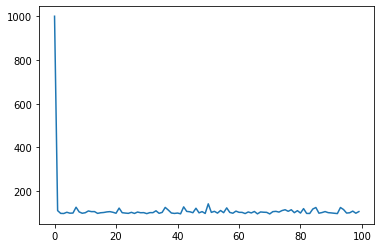

In [ ]:
plt.plot(losses)

In [ ]:
W, B = mysvm.W, mysvm.b
print(W, b)

[[ 0.65861761 -2.1376977 ]] -1.241000000000053


In [ ]:
def viz_hyperplane(w1, w2, b):

  x1 = np.linspace(-1, 3, 10)
  x2 = -(w1*x1 + b)/w2

  xp = -(w1*x1 + b + 1)/w2
  xn = -(w1*x1 + b - 1)/w2 

  plt.figure(figsize = (12,12))
  plt.plot(x1,x2)
  plt.plot(x1, xp)
  plt.plot(x1, xn)
  plt.scatter(X[:,0], X[:,1], c=Y)
  plt.show

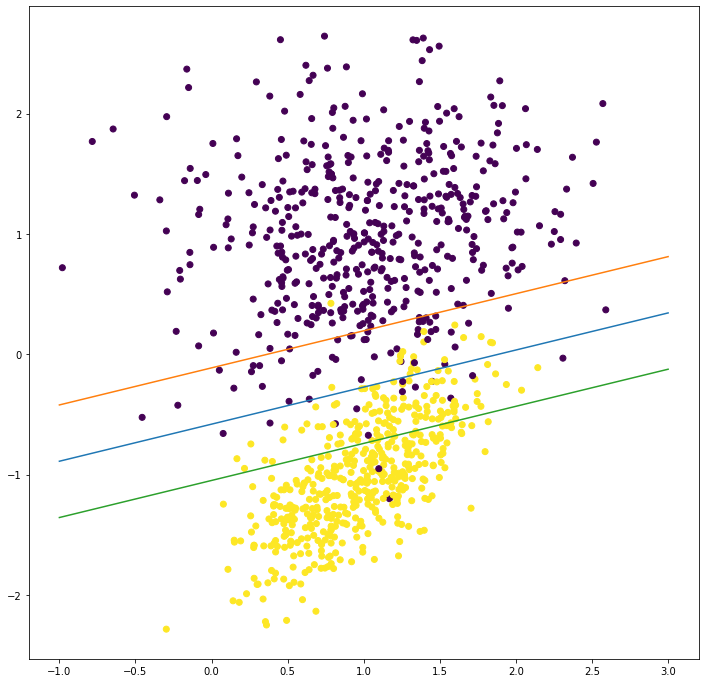

In [ ]:
viz_hyperplane(W[0, 0], W[0, 1], B)